In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm
#%matplotlib notebook

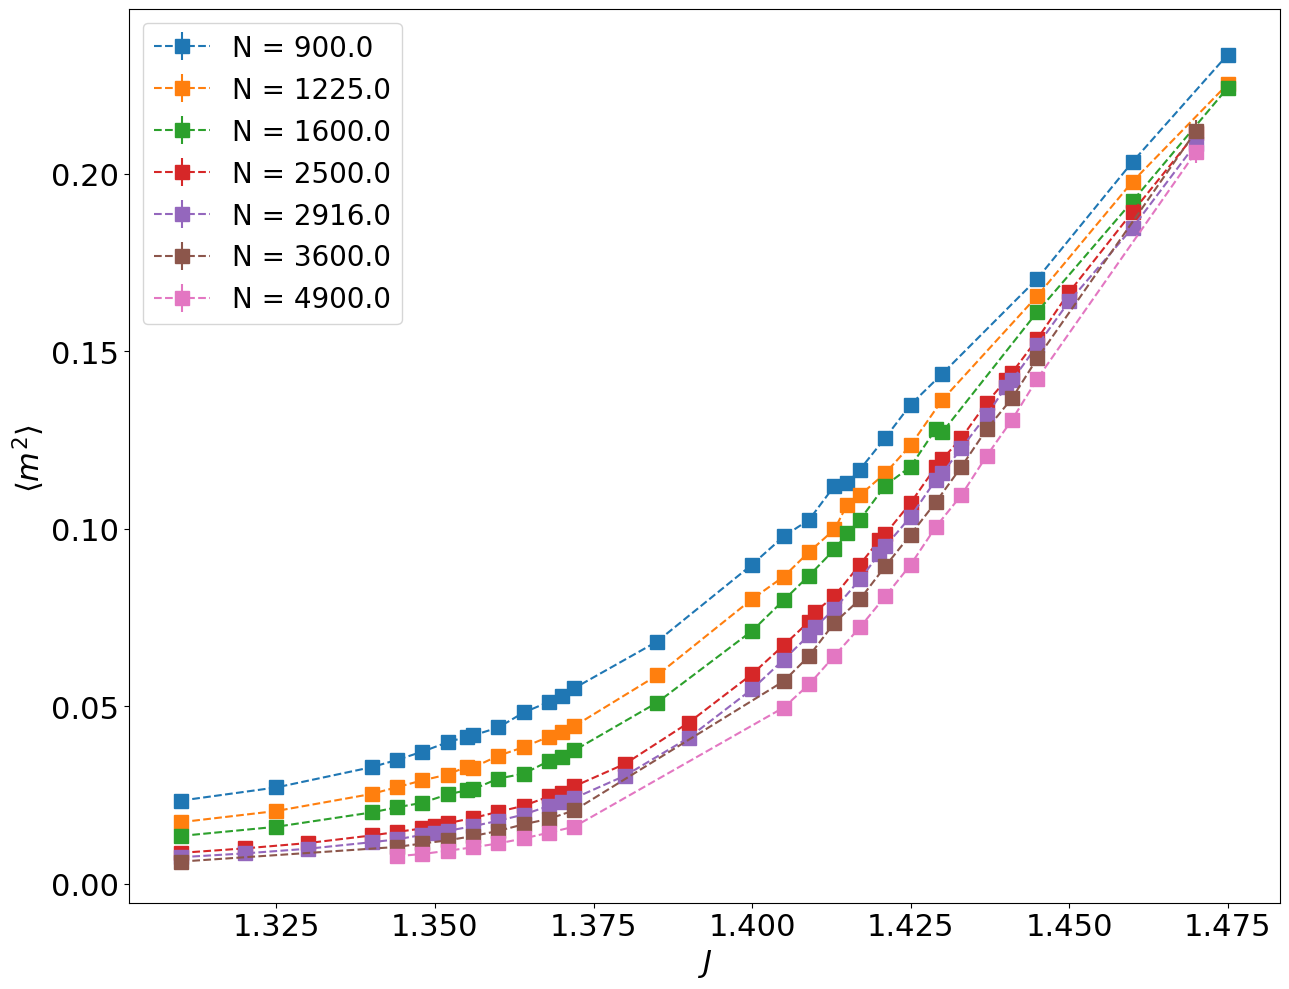

In [2]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))
  
    
data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)
#data_np1 = np.loadtxt("CPP/ClusterUpdateFix2/LongChains.txt", skiprows=0)
#data_np = np.vstack((data_np, data_np1))
data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    
    if l<900: continue
   
    if l>4900: continue 
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    
    bc = data_l[:,17]
    # 
    errs = data_l[:,18]
   

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(top=0.28)
#plt.xlim(left = 1.255, right=1.355)
#plt.axes().set_xlim(right=1.325)
#plt.grid()
#ax.set_lim()
plt.legend(loc="best", fontsize=20)

plt.tight_layout()

plt.savefig("Thesis/Images/magnetization2_longchains.png", bbox_inches='tight')

In [3]:
data_l[:,1]

array([1.344, 1.348, 1.352, 1.356, 1.36 , 1.364, 1.368, 1.372, 1.405,
       1.409, 1.413, 1.417, 1.421, 1.425, 1.429, 1.433, 1.437, 1.441,
       1.445, 1.47 ])

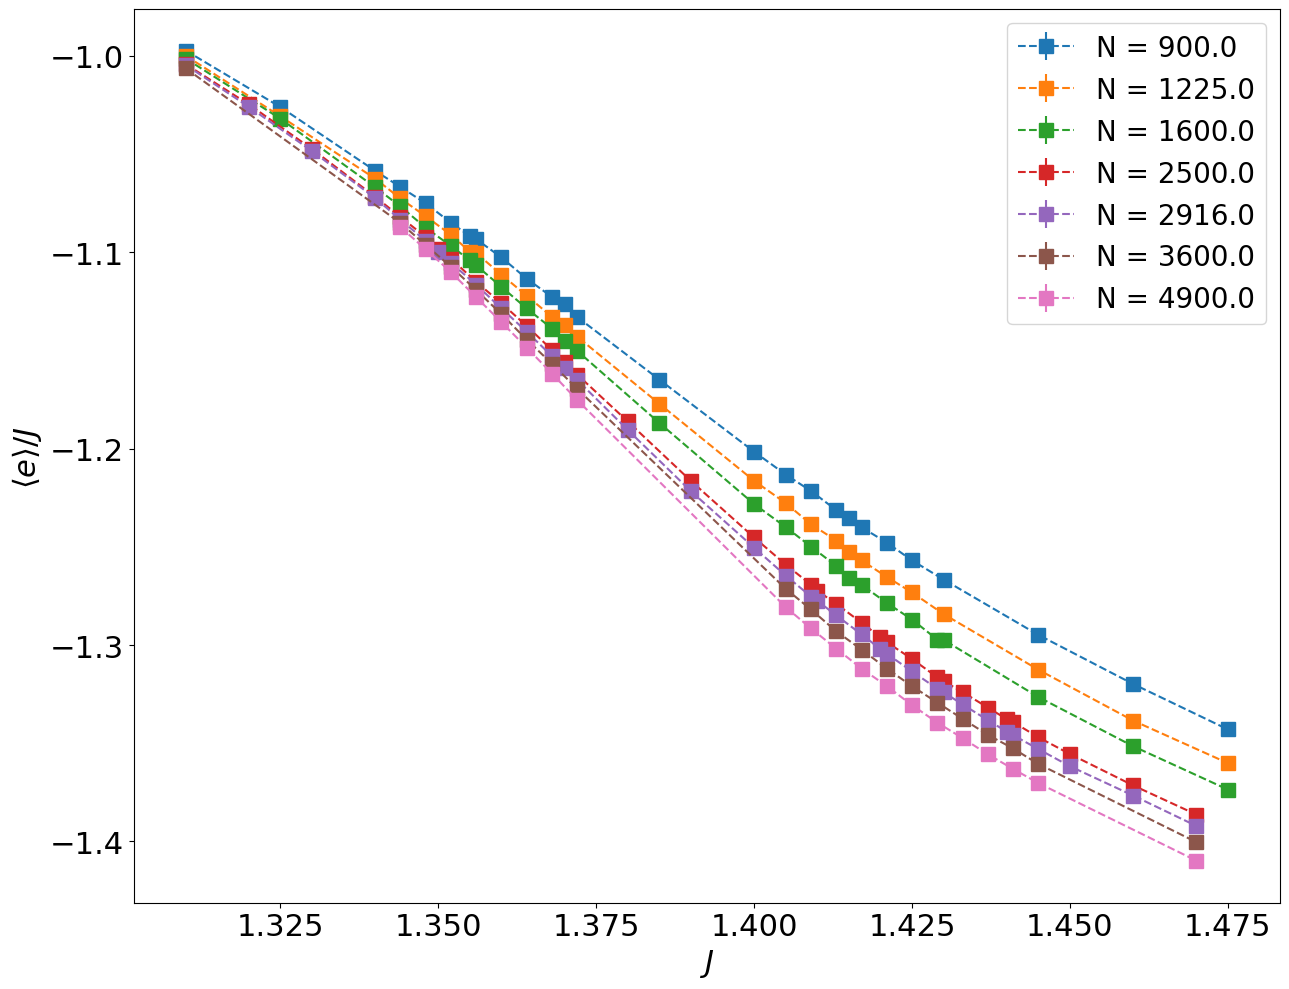

In [5]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

#data_np = np.loadtxt("CPP/ClusterUpdateFix/LongChains.txt", skiprows=0)
#data_np = np.loadtxt("CPP/RadiusPlot3/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)
#data_np1 = np.loadtxt("CPP/ClusterUpdateFix2/LongChains.txt", skiprows=0)
#data_np = np.vstack((data_np, data_np1))
data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)



y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if l>4900: continue
   
    #if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    bc = data_l[:,7] 
    errs = data_l[:,8]
 

    plt.errorbar(J_l, -bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle e \rangle / J $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)
#plt.ylim(-1.45)
#plt.xlim(left = 1.255, right=1.355)
#plt.grid()

plt.legend(loc="best", fontsize=20)

plt.tight_layout()

#plt.savefig("Thesis/Images/energy_longchains.png", bbox_inches='tight')
#plt.savefig("/home/kamilla/SAW_paper_KF_1/img/energy_longchains.png")

In [6]:
data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)
 
lengths = np.unique(data_np[:, 1])
lengths

array([1.31 , 1.32 , 1.325, 1.33 , 1.34 , 1.344, 1.348, 1.35 , 1.352,
       1.355, 1.356, 1.36 , 1.364, 1.368, 1.37 , 1.372, 1.38 , 1.385,
       1.39 , 1.4  , 1.405, 1.409, 1.41 , 1.413, 1.415, 1.417, 1.42 ,
       1.421, 1.425, 1.429, 1.43 , 1.433, 1.437, 1.44 , 1.441, 1.445,
       1.45 , 1.46 , 1.47 , 1.475])

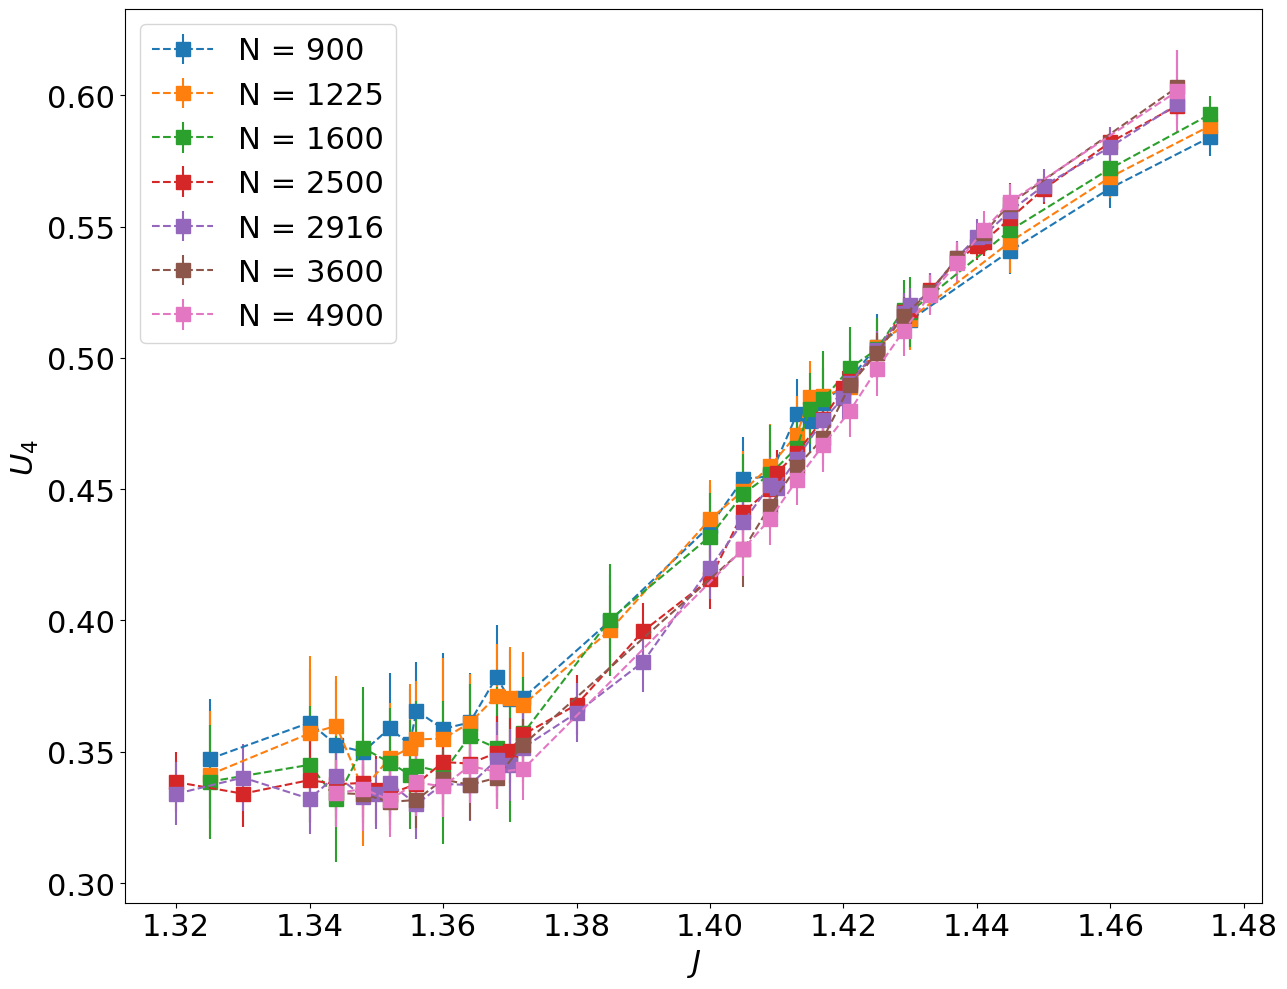

In [14]:
#data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)
 
    
    
data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

#data_np = data_np[data_np[:,0]<=2500]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

l, b, h, w = .6058485, .1285175, .2531, .3402
#ax2 = fig.add_axes([l, b, w, h])

J_min = 1.415
J_max = 1.45

#J_min = 1.42
#J_max = 1.441

data_np = data_np[data_np[:,1]>1.31]

for l in lengths:
    if (l>8000): continue
        #continue
        
    #if (l==6000): continue
        
    #if l!=900: continue 
    data_l1 = data_np[data_np[:,0]==l]
    
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    J_lplot = []
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
        
        #print(data_l[:,21])
        
        ind = np.argmin(data_l[:, 16])
        
        data_l = data_l[ind, :]        
        m2 = norm.rvs(data_l[17], data_l[18], size =  1000 )
        m4 = norm.rvs(data_l[19], data_l[20], size =  1000 )
 
        cum = 1 - m4/3/m2/m2
        mean = np.mean(cum)
        
        err=np.std(cum) 
        
        if (err>0.06): continue
        
        bc.append(mean)
        errs.append(err)
        J_lplot.append(J)

    ax.errorbar(J_lplot, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
    
    data_l1 = data_np[data_np[:,0]==l]
    data_l1 = data_l1[data_l1[:,1]>J_min]
    data_l1 = data_l1[data_l1[:,1]<J_max]
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    J_lplot = []
 
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
 
        ind = np.argmin(data_l[:, 16])
        
        data_l = data_l[ind, :]        
 
        m2 = norm.rvs(data_l[17], data_l[18], size =  1000 )
        m4 = norm.rvs(data_l[19], data_l[20], size =  1000 )
 
        cum = 1 - m4/3/m2/m2
        mean = np.mean(cum)
        
        err=np.std(cum) 
        
        if (err>0.06): continue
        
        bc.append(mean)
        errs.append(err)
        J_lplot.append(J)
 
    
    
    #ax2.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))    
    
    #print(errs)
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
ax.set_xlabel(r'$J$', fontsize = 22)
ax.set_ylabel(r"$ U_4 $ ", fontsize=22)
ax.tick_params(axis='x', labelsize=22) 
ax.tick_params(axis='y', labelsize=22) 



#ax2.tick_params(axis='x', labelsize=16) 
#ax2.tick_params(axis='y', labelsize=16) 
#plt.ylim(0.02, 0.6)
#plt.xlim(0.825, 0.844)
#plt.xlim(0.825, 0.838)
 
plt.tight_layout()
ax.legend(loc="best", fontsize=22)
plt.savefig("../XY/img/bindercumulants_longchains.png", bbox_inches='tight')

/var/folders/cf/kjwknm9n4zj3gkvp12xwk4yh0000gn/T/ipykernel_8229/1506418484.py:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


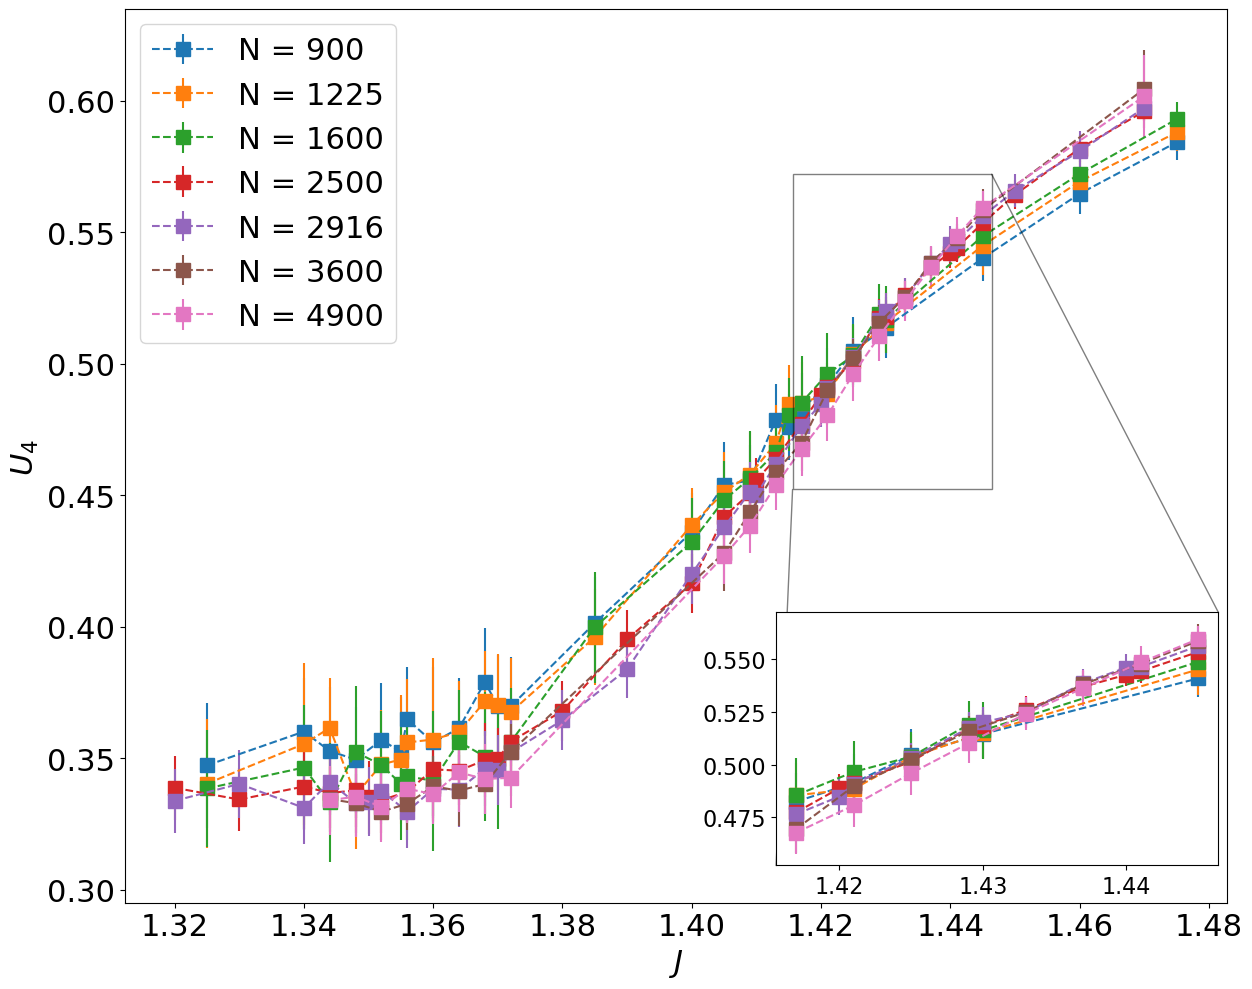

In [16]:
#data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)
 
    
    
data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

#data_np = data_np[data_np[:,0]<=2500]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

l, b, h, w = .6008485, .1285175, .2531, .3402
ax2 = fig.add_axes([l, b, w, h])

J_min = 1.415
J_max = 1.45

#J_min = 1.42
#J_max = 1.441

data_np = data_np[data_np[:,1]>1.31]

for l in lengths:
    if (l>8000): continue
        #continue
        
    #if (l==6000): continue
        
    #if l!=900: continue 
    data_l1 = data_np[data_np[:,0]==l]
    
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    J_lplot = []
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
        
        #print(data_l[:,21])
        
        ind = np.argmin(data_l[:, 16])
        
        data_l = data_l[ind, :]        
        m2 = norm.rvs(data_l[17], data_l[18], size =  1000 )
        m4 = norm.rvs(data_l[19], data_l[20], size =  1000 )
 
        cum = 1 - m4/3/m2/m2
        mean = np.mean(cum)
        
        err=np.std(cum) 
        
        if (err>0.06): continue
        
        bc.append(mean)
        errs.append(err)
        J_lplot.append(J)

    ax.errorbar(J_lplot, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
    
    data_l1 = data_np[data_np[:,0]==l]
    data_l1 = data_l1[data_l1[:,1]>J_min]
    data_l1 = data_l1[data_l1[:,1]<J_max]
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    J_lplot = []
 
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
 
        ind = np.argmin(data_l[:, 16])
        
        data_l = data_l[ind, :]        
 
        m2 = norm.rvs(data_l[17], data_l[18], size =  1000 )
        m4 = norm.rvs(data_l[19], data_l[20], size =  1000 )
 
        cum = 1 - m4/3/m2/m2
        mean = np.mean(cum)
        
        err=np.std(cum) 
        
        if (err>0.06): continue
        
        bc.append(mean)
        errs.append(err)
        J_lplot.append(J)
 
    
    
    ax2.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))    
    
    #print(errs)
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
ax.set_xlabel(r'$J$', fontsize = 22)
ax.set_ylabel(r"$ U_4 $ ", fontsize=22)
ax.tick_params(axis='x', labelsize=22) 
ax.tick_params(axis='y', labelsize=22) 
ax2.tick_params(axis='x', labelsize=16) 
ax2.tick_params(axis='y', labelsize=16) 

ax.indicate_inset_zoom(ax2, edgecolor="black")
#plt.ylim(0.02, 0.6)
#plt.xlim(0.825, 0.844)
#plt.xlim(0.825, 0.838)
 
plt.tight_layout()
ax.legend(loc="best", fontsize=22)
plt.savefig("../XY/img/bindercumulants_longchains.png", bbox_inches='tight')

#plt.savefig("Thesis/Images/bindercumulants_longchains.png", bbox_inches='tight')

#plt.savefig("/home/kamilla/SAW_paper_KF_1/img/bindercumulants_longchains.png", bbox_inches='tight')

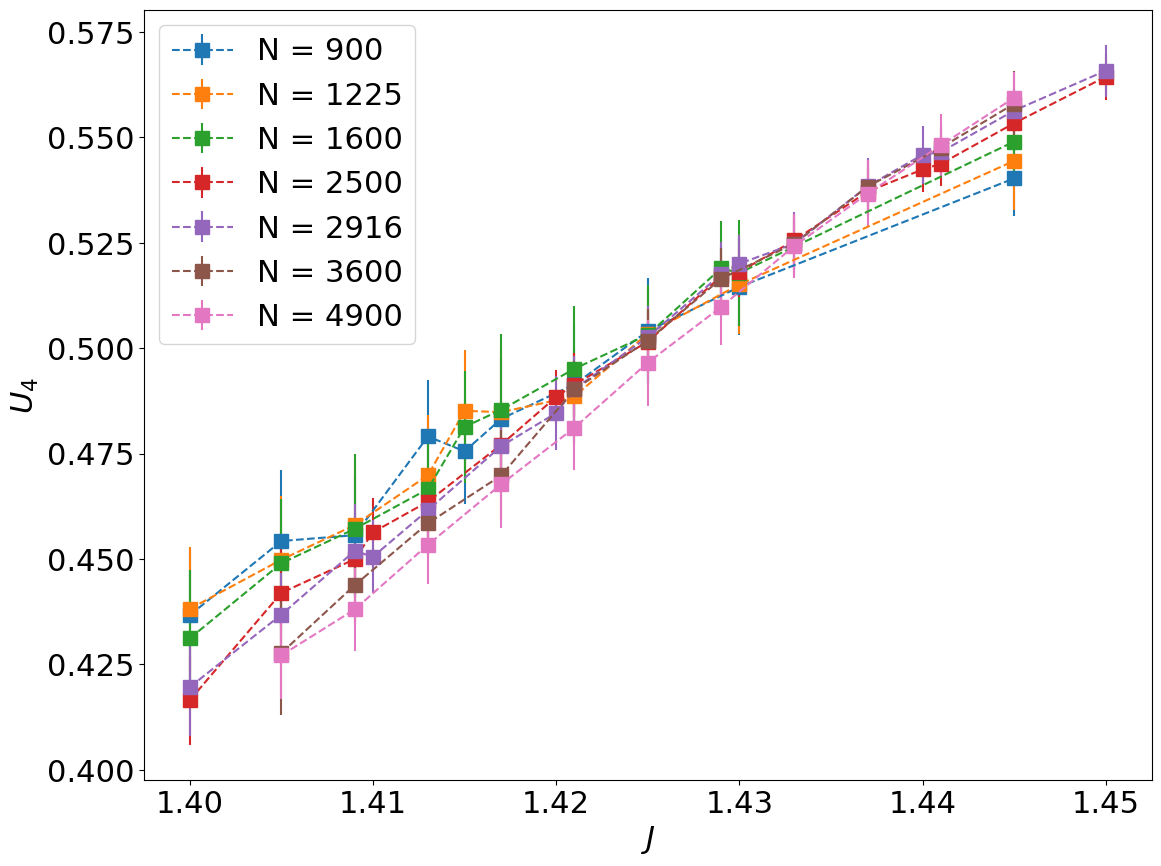

In [8]:
data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)


data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)




y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

#data_np = data_np[data_np[:,0]<=2500]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

#l, b, h, w = .1485, .175, .31, .402
#ax2 = fig.add_axes([l, b, w, h])

J_min = 1.4
J_max = 1.45
data_np = data_np[data_np[:,1]<=J_max]
data_np = data_np[data_np[:,1]>=J_min]

for l in lengths:
    if (l>8000): continue
        #continue
        
    #if (l==6000): continue
        
    #if l!=900: continue 
    data_l1 = data_np[data_np[:,0]==l]
    
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    J_lplot = []
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
        
        #print(data_l[:,21])
        
        ind = np.argmin(data_l[:, 16])
        
        data_l = data_l[ind, :]        
        m2 = norm.rvs(data_l[17], data_l[18], size =  1000 )
        m4 = norm.rvs(data_l[19], data_l[20], size =  1000 )
 
        cum = 1 - m4/3/m2/m2
        mean = np.mean(cum)
        
        err=np.std(cum)
        
        if (err>0.03): continue
 
        
        bc.append(mean)
        errs.append(err)
        J_lplot.append(J)

    plt.errorbar(J_lplot, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
    #print(errs)
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(0.02, 0.6)
#plt.xlim(0.825, 0.844)
#plt.xlim(0.825, 0.838)
 

plt.legend(loc="best", fontsize=22)


#plt.savefig("Thesis/Images/bindercumulants_longchains_deep.png", bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)

data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)

#data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)

#lengths
lengths = [1.27, 1.28, 1.29, 1.3, 1.31, 1.32]
lengths = [1.26, 1.27, 1.275, 1.285, 1.295, 1.305, 1.315, 1.325]
lengths = [1.31 , 1.325, 1.34 , 1.355, 1.37 , 1.385, 1.4  , 1.41 , 1.415,
       1.417]

data_np = data_np[data_np[:,0]<4900]
data_np = data_np[data_np[:,0]>800]

lengths = np.unique(data_np[:, 1]) 
lengths = lengths[lengths>=1.38]
lengths = lengths[lengths<=1.46]
for l in lengths:
    
    data_l1 = data_np[data_np[:,1]==l]
    
    if (len(data_l1)<=3): continue
    
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 0])
    
    bc = []
    errs=[]
    J_lplot = []
    for J in J_l :
        
        data_l = data_l1[data_l1[:,0]==J]
 
        
        ind = np.argmin(data_l[:, 16])
        
        
        data_l = data_l[ind, :]        
        m2 = norm.rvs(data_l[17], data_l[18], size =  1000 )
        m4 = norm.rvs(data_l[19], data_l[20], size =  1000 )
 
        cum = 1 - m4/3/m2/m2
        mean = np.mean(cum)
        
        err=np.std(cum) 
        
        if (err>0.025): continue
        
        bc.append(mean)
        errs.append(err)
        J_lplot.append(1/J)

    plt.errorbar(J_lplot, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(float(l)))
 
 
plt.xlabel(r'$1/N $', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.xlim(1.26, 1.45)
#plt.ylim(0.05, 0.60795)
 
#plt.xlim(left = 1.255, right=1.355)
plt.legend(fontsize=22)

#plt.xscale("log")
#plt.grid()
plt.tight_layout()

#plt.axhline(0.55815702, c= "k")

plt.savefig("Thesis/Images/bindercumulants_longchains_1n.png", bbox_inches='tight')



In [ ]:
data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)
data_np[data_np[:,0]==2500][:,1]

In [ ]:
data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)
#data_np1 = np.loadtxt("CPP/ClusterUpdateFix2/LongChains.txt", skiprows=0)
#data_np = np.vstack((data_np, data_np1))



data_np = np.loadtxt("CPP/Checking/LongChains0604.txt", skiprows=0)


data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)



y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

l, b, h, w = .485, .175, .31, .402
#ax2 = fig.add_axes([l, b, w, h])
#ax2.plot([1, 4, 6, 2, 1, 5, 2], color='green', lw=3, label="inside plot")


for l in lengths:
    #if l<900: continue
    #if l==5000: continue
        
    #if l==1000: continue
    
    #if (l==4900 or l==3600 or l==2916 or l==2500 or l==1600): continue
        
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]     
    J_l = data_l[:, 1]
    bc = 1 - data_l[:,19]/3/data_l[:,17]/data_l[:,17]
    errs = (2*data_l[:,18] / data_l[:,17])**2 + (data_l[:,20] /data_l[:,19])
    errs=np.sqrt(errs)*bc
    ax.errorbar(J_l, bc, yerr=0.9*errs, fmt="s--", ms = 10, label = "N = " + str(l))
    
    #data_l=data_l[ind] 
    #data_l = data_l[data_l[:,1]>1.291]
    #data_l = data_l[data_l[:,1]<1.3181]
    J_l = data_l[:, 1]
    bc = 1 - data_l[:,19]/3/data_l[:,17]/data_l[:,17]
    errs = (2*data_l[:,18] / data_l[:,17])**2 + (data_l[:,20] /data_l[:,19])
    errs=np.sqrt(errs)*bc    
    
    #ax2.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
ax.plot([J_l[0], np.max(data_np[:,1])], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
ax.set_xlabel(r'$J$', fontsize = 22)
ax.set_ylabel(r"$ U_4 $ ", fontsize=22)
ax.tick_params(axis='x', labelsize=22) 
ax.tick_params(axis='y', labelsize=22) 
#plt.ylim(1/3 -0.8, 0.7)
#plt.xlim(1.2, 1.45)
 
#plt.xlim(left = 1.255, right=1.355)

#ax.set_xlim(left = 1.28, right=1.34)
#ax2.set_xlim(1.291,1.3181)


fig.tight_layout()

ax.legend(loc="best", fontsize=20)
 
 
#ax.tight_layout()

#plt.savefig("Thesis/Images/bindercumulants_longchains.png", bbox_inches='tight')
#plt.savefig("/home/kamilla/SAW_paper_KF_1/img/bindercumulants_longchains.png")

/var/folders/cf/kjwknm9n4zj3gkvp12xwk4yh0000gn/T/ipykernel_8229/3763821548.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


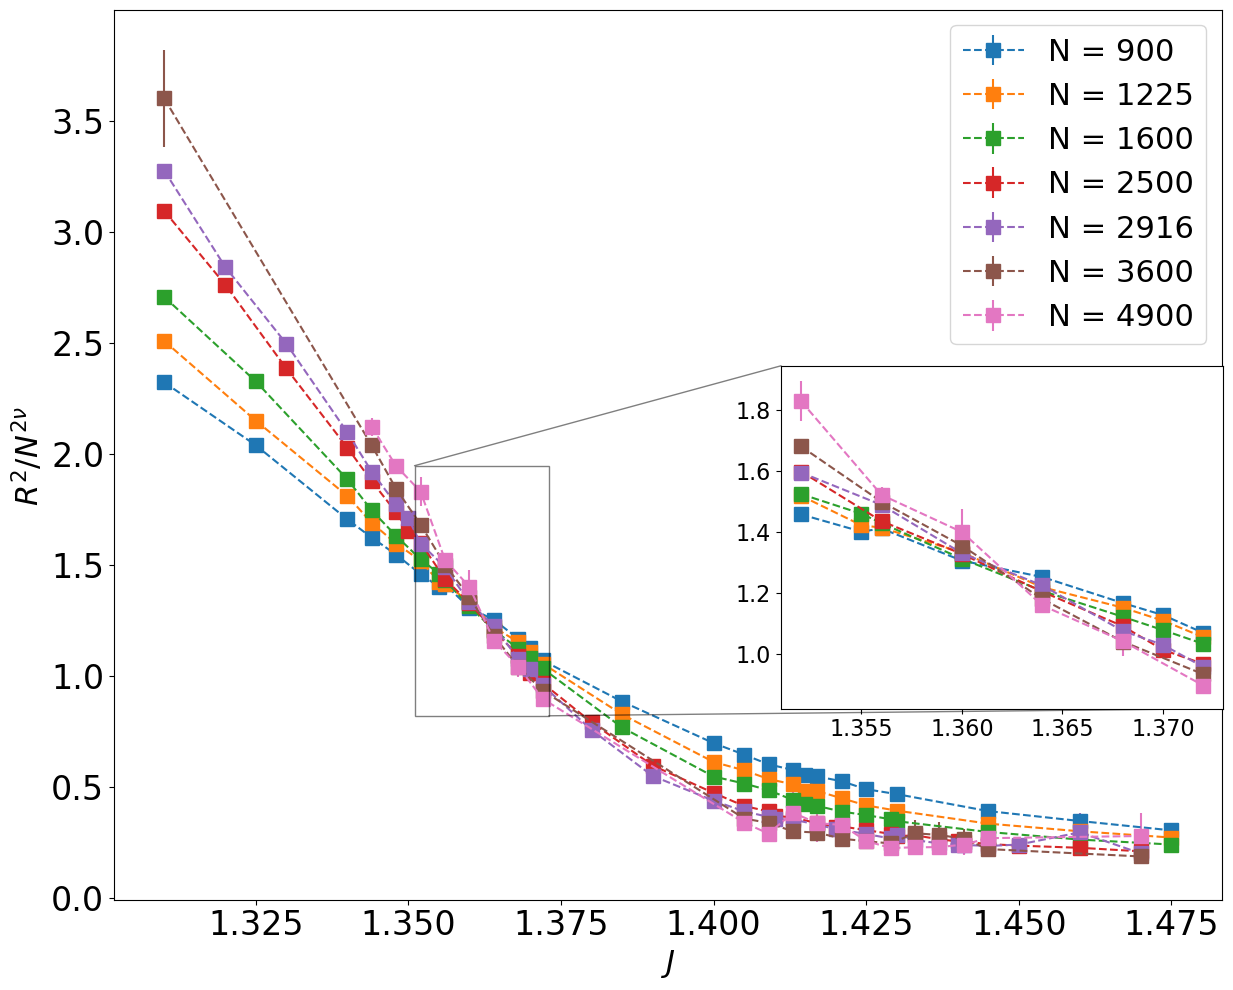

In [20]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))


J_min = 1.28
J_max = 1.34
data_np = data_np[data_np[:,1]<=J_max]
data_np = data_np[data_np[:,1]>=J_min]


#data_np = np.loadtxt("CPP/RadiusPlot/LongChains.txt", skiprows=0)

data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)
#data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)
#data_np1 = np.loadtxt("CPP/ClusterUpdateFix2/LongChains.txt", skiprows=0)
#data_np = np.vstack((data_np, data_np1))
data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7
 
    

l, b, h, w = .6046361485, .2863175, .3429, .3402
ax2 = fig.add_axes([l, b, w, h])
J_min = 1.3501
J_max = 1.378

for l in lengths:
    #if l!=900: continue
    if l>4900: continue
    #if l==2916: continue
    #if (l==4900 or l==3600 or l==29160 or l==25000): continue
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
 
    errs = data_l[:, 4]/np.power(l, 2*nu)

    ax.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))

    data_l = data_l[data_l[:,1]<=J_max]
    data_l = data_l[data_l[:,1]>=J_min]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
 
    errs = data_l[:, 4]/np.power(l, 2*nu)

    ax2.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))    
    
 
ax.set_xlabel(r'$J$', fontsize = 22)
ax.set_ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
ax.tick_params(axis='x', labelsize=24) 
ax.tick_params(axis='y', labelsize=24) 
ax2.tick_params(axis='x', labelsize=16) 
ax2.tick_params(axis='y', labelsize=16) 
#plt.ylim(0.05, 0.67795)
ax.indicate_inset_zoom(ax2, edgecolor="black")
#plt.xlim(left = 1.28, right=1.34)
ax.legend(fontsize=22)

#plt.grid()
plt.tight_layout()
plt.savefig("../XY/img/rscaling_longchains.png", bbox_inches='tight')
#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
#plt.savefig("Thesis/Images/rscaling_longchains.png", bbox_inches='tight')
#plt.savefig("/home/kamilla/SAW_paper_KF_1/img/scaling_longchains.png")

In [ ]:
J_l

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25,7)) #,  sharey='row')
axes = axes.reshape(-1)

data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)

data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])


for l in lengths:
    if l<900: continue
    if (l==100 or l ==400): continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    axes[0].errorbar(J_l, data_l[:,22], yerr=data_l[:,23], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",XY")
    axes[1].errorbar(J_l, data_l[:,24], yerr=data_l[:,25], alpha = 0.95, fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",XY")
    axes[2].errorbar(J_l, data_l[:,26], yerr=data_l[:,27], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",CY")
    
  
#axes[1].axvline(0.667, c ="k") 
#axes[0].axvline(0.667, c ="k") 
#axes[2].axvline(0.667, c ="k") 


#axes[1].axvline(0.832, c ="brown", ls = "--") 
#axes[0].axvline(0.832, c ="brown", ls = "--") 
#axes[2].axvline(0.832, c ="brown", ls = "--") 
 
    
#axes[0].set_title(r'$n_2$', fontsize=22)    
#axes[1].set_title(r'$n_3$', fontsize=22)    
#axes[2].set_title(r'$n_4$', fontsize=22)    
axes[0].set_ylabel(r'$n_2$', fontsize=22)    
axes[1].set_ylabel(r'$n_3$', fontsize=22)    
axes[2].set_ylabel(r'$n_4$', fontsize=22)  

axes[0].legend(fontsize = 19)
#axes[1].legend(fontsize = 10)
#axes[2].legend(fontsize = 11)


for i in range(3):
    axes[i].set_xlabel("J", fontsize=22)
    axes[i].tick_params(axis='x', labelsize=22) 
    axes[i].tick_params(axis='y', labelsize=22) 
 
    
    
plt.tight_layout()

plt.savefig("Thesis/Images/bulk_longchains.png", bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
 
data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]


J_min = 1.28
J_max = 1.41
data_np = data_np[data_np[:,1]<=J_max]
#data_np = data_np[data_np[:,1]>=J_min]
 
lengths = np.unique(data_np[:, 0])


for l in lengths:
    if l<900: continue
        
    #if (l==4900 or l==3600 or l==25000): continue

    #if (l>3600): continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    plt.errorbar(J_l, data_l[:,32], yerr=data_l[:,33], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",Ising")
   

#plt.axhline(0.3726, c ="purple") 
#plt.axvline(1.35, c ="brown", ls = "--", alpha =0.7) 
    
ax.set_ylabel(r'$A$', fontsize=22)    
#plt.xlim(left = 1.255, right=1.355)


plt.legend(fontsize = 13)

plt.tick_params(axis='y', labelsize=22) 
plt.tick_params(axis='x', labelsize=22) 
plt.savefig("Thesis/Images/aspherical_longchains.png", bbox_inches='tight')

In [ ]:
def r_on_n(n, nu, b):
    return 2*nu*n+b
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]>1.25] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

#data_np = np.loadtxt("CPP/ClusterUpdateFix1/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)

data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 1])
 

nu=4/7

 
#data_np = data_np[data_np[:,0]<3600]
#data_np = data_np[data_np[:,0]>800]

# data_np = data_np[data_np[:,1]<1.35]


J_min = 1.3
J_max = 1.38
data_np = data_np[data_np[:,1]<=J_max]
#data_np = data_np[data_np[:,1]>=J_min]


lengths = np.unique(data_np[:, 0])
J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    data_l = data_l[data_l[:,0]>99]
    data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,3]
    err_r = data_l[:,6] 
    if(len(data_l)<3): continue
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r, absolute_sigma=False )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    print(J, popt, pcov)
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [4/7, 4/7], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18
#plt.xlim("right=")
#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)

plt.legend(loc="best", fontsize=20)
plt.savefig("Thesis/Images/nu_shortchains_1.png", bbox_inches='tight')    

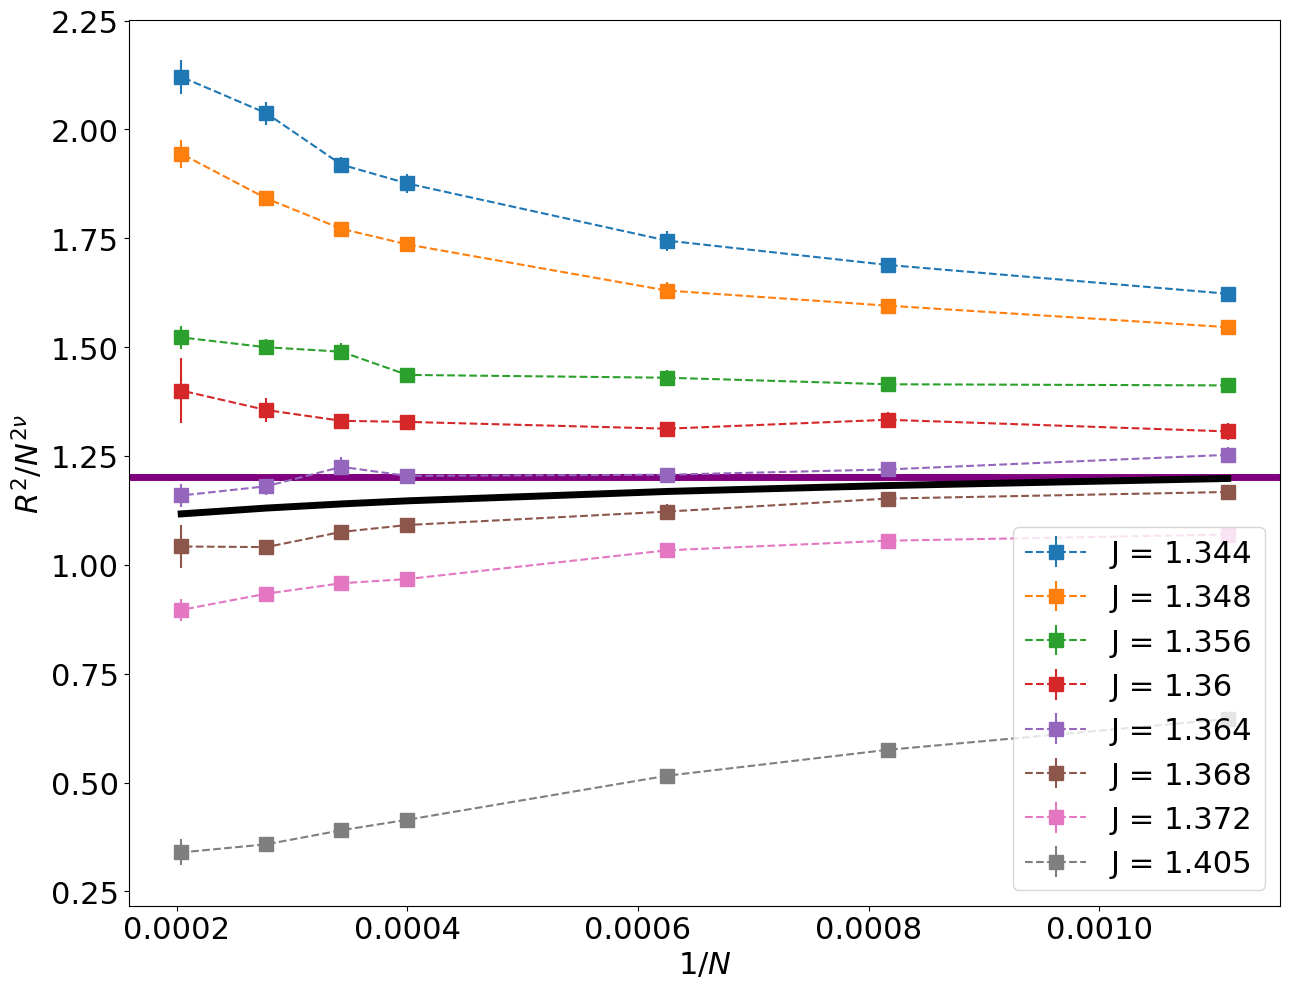

In [6]:

data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)



y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 1])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7

 
data_np = data_np[data_np[:,0]<=4900]
data_np = data_np[data_np[:,0]>800]

lengths = np.unique(data_np[:, 0])
 

data_save = []

for l in lengths:
    #if (l>9000):
    #    continue
        
    #if (l==6000): continue
        
        
    data_l1 = data_np[data_np[:,0]==l]
    
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    J_lplot = []
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
        
        ind = np.argmin(data_l[:, 4])
        #print(ind, len(data_l[:, 16]))
        
        data_l = data_l[ind, :]
 
        
        data_save.append(data_l)

data_np = np.array(data_save)


data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)


lengths = np.unique(data_np[:, 1])

lengths = [ 1.32 ,  1.33 , 1.344, 1.348, 1.35 ,  
       1.356, 1.36 , 1.364, 1.368, 1.372, 1.38 ,  1.385,
       1.39, 
           #1.4  , 
           1.405  ]    
        
for l in lengths:
    
    #if ((l*100)%1!=0): continue
    #if l<900: continue
    #if (l==4900 or l==36000 or l==25000): continue
    data_l = data_np[data_np[:,1]==l]
    
    if (len(data_l)<4): continue
    
    ind = np.argsort(data_l[:,0])
    data_l=data_l[ind]
    J_l = data_l[:, 0]
    #print(J_l)
    r_l = data_l[:, 3]
    
    bc = r_l/np.power( data_l[:, 0], 2*nu)
 
    errs = data_l[:, 4]/np.power( data_l[:, 0], 2*nu)

    plt.errorbar(1/J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "J = " + str((l)))
 
 
plt.xlabel(r'$1/N $', fontsize = 22)
plt.ylabel(r"$ R ^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(1.26, 1.45)
#plt.ylim(0.05, 0.60795)
 
#plt.xlim(left = 1.255, right=1.355)
plt.legend(fontsize=22)

#plt.xscale("log")
#plt.grid()
plt.tight_layout()

plt.axhline(1.200729009998, c= "purple", lw=5)

lmin = np.min(np.unique(data_l[:,0]))
lmax = np.max(np.unique(data_l[:,0]))
 
Ns = np.array([lmin, lmax])
k = 2*(nu-1/2)
#plt.plot(Ns, k*Ns+0.34, ms = 10, label = "J = " + str((l)))

lengths = np.unique(data_np[:, 0])

b =  0
nu1=1/2
y = (np.power(lengths+1, 2*nu1)*(1+b)+lengths)/lengths**(2*nu)
y = (np.power(lengths, 2*nu1)*(1+b) )/lengths**(2*nu)+0.07
plt.plot(1/lengths, y+0.75, "-", c="k", lw=5)
 

#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
plt.savefig("/Users/kamillafaizullina/Desktop/SAW/XY/img/rscaling_longchainscross.png", bbox_inches='tight')
#plt.savefig("/home/kamilla/SAW_paper_KF_1/img/rscaling_longchainscross.png", bbox_inches='tight')

In [ ]:
y

In [ ]:
Ns, Ns*k, k

In [ ]:
np.unique(data_np[:,1])

In [ ]:
lengths = np.unique(data_np[:, 1])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)

data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)


#lengths
lengths = [1.27, 1.28, 1.29, 1.3, 1.31, 1.32]
lengths = [1.26, 1.27, 1.275, 1.285, 1.295, 1.305, 1.315, 1.325]
lengths = [1.34 , 1.344, 1.348, 1.35 , 1.352, 1.356,
       1.36 , 1.364, 1.368, 1.37 ]

lengths = [1.31 , 1.32 , 1.325, 1.33 , 1.34 , 1.344, 1.348, 1.35 , 1.352,
       1.355, 1.356, 1.36 , 1.364, 1.368, 1.37 , 1.372, 1.38 , 1.385,
       1.39 , 1.4  , 1.41 , 1.415, 1.42 , 1.43 , 1.44 , 1.445, 1.45 ,
       1.46 , 1.47 , 1.475]

data_np = data_np[data_np[:,0]<=4900]
data_np = data_np[data_np[:,0]>800]


for l in lengths:
    #if l<900: continue
    #if (l==4900 or l==36000 or l==25000): continue
    data_l = data_np[data_np[:,1]==l]
    if (len(data_l)<3): continue
    
    ind = np.argsort(data_l[:,0])
    data_l=data_l[ind]
    J_l = data_l[:, 0]
    #print(J_l)
    r_l = data_l[:, 3]
    
    bc = r_l/np.power( data_l[:, 0], 2*nu)
 
    errs = data_l[:, 4]/np.power( data_l[:, 0], 2*nu)

    plt.errorbar(1/J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str((l)))
 
 
plt.xlabel(r'$1/N $', fontsize = 22)
plt.ylabel(r"$ R ^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.xlim(1.26, 1.45)
#plt.ylim(0.05, 0.60795)
 
#plt.xlim(left = 1.255, right=1.355)
plt.legend(fontsize=22)

plt.xscale("log")
#plt.grid()
plt.tight_layout()

#plt.axhline(0.32369525, c= "k")

#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
plt.savefig("Thesis/Images/rscaling_longchainscross_deep.png", bbox_inches='tight')

In [ ]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if l<900: continue
    #if l==5000: continue
        
    #if l==1000: continue
        
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]    
    
    
    J_l = data_l[:, 1]
    
    #print(bc)
    #print(data_l[:,17])
    
    bc = 1 - data_l[:,11]/3/data_l[:,9]/data_l[:,9]
    #print(bc)
  
    errs = (2*data_l[:,10] / data_l[:,9])**2 + (data_l[:,12] /data_l[:,11])
    errs=0*np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(1/3 -0.8, 0.7)
#plt.xlim(1.2, 1.45)
 
#plt.xlim(left = 1.255, right=1.355)


plt.legend(loc="best", fontsize=20)
 
 
plt.tight_layout()

plt.savefig("Thesis/Images/bindercumulantsenergy_longchains.png", bbox_inches='tight')

In [ ]:
#data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)

data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)
data_np1 = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))
data_np1 = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/ClusterUpdateFix2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/ClusterUpdateFix/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

 
#data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)
#data_np = np.loadtxt("CPP/Iteration0/XY_Iteration0.3.txt", skiprows=1)
data_np1 = np.loadtxt("CPP/MainRUn/LongChains_June.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

J_min = 1.34
J_max = 1.38
data_np = data_np[data_np[:,1]<=J_max]
data_np = data_np[data_np[:,1]>=J_min]

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
 
    
pairs = [[900,1225], [900,1600], [1225,1600],[900,2500],  [1600, 2500], [900,2916],[1600,3600], [2500,3600], [1225, 4900],
         [1600,4900], [2500,4900]  ]

#pairs = [  [1225, 2500] ]#, [2500,2916]]
#pairs = [[100,500], [500,1000]]
#[  [1600, 2500], [1600,3600], [2500,3600]]
 
#pairs = [  [2500, 4900],[1600,3600] ]


#pairs = [  [900,1225], [900,1600], [1225,1600]]
#pairs = [  [900,1600], [1600,3600], [1225,2500], [2500,4900]]


#pairs = [   [900,1600],  [1600, 4900] ]

#pairs = [  [900,1600],  [900,2500],  [900,2916],[1600,3600], [2500,3600], [1225, 4900],
#                  [1600,4900], [2500,4900]  ]
 
#pairs = [   [900, 2916],  [1600, 3600] ]

#pairs = [  [900,1600], [1600,3600], [1225,2500], [2500,4900]]

#pairs = [[1600,4900], [2500,4900], [900,2500]   ]

pairs = [[900,2500], [2500,4900], [900,1600]]

#pairs = [   [900,2500],  [1600, 3600] ]


#pairs = [   [900,2500],  [1600, 3600], [1225,4900], [1225,2916] ]


#pairs = [   [900, 2916],  [1600, 3600] ]

pairs = [  [900,1600], [1600,3600], [1225,2500], [2500,4900]]

 

pairs = [  [900,2500], [1225,4900], [2500,4900]]


fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


c = 0 
markers = ["d", "v", "s", "*", "^", "p", "o", "D", "*", "^"]+["d", "v", "s", "*", "^", "p", "o", "D", "*", "^"]
markers+=markers
L_plot = []
BC_plot = []
err_plot = []
J_plot = []
J_err_plot = []

J_l1 = np.unique(data_np[:, 1])
i=0
for pair in pairs:
    
     
    data_l1 = data_np[data_np[:,0]==pair[0]]
    data_l2 = data_np[data_np[:,0]==pair[1]]
    #print(data_l1)
    if(len(data_l1)<2): continue
    if(len(data_l2)<2): continue
        
    print(pair)
        
    bc = []
    errs=[]
    J_plot = []
 
    for J in J_l1 :

        if (len(data_l1[data_l1[:,1]==J])==0): continue
        if (len(data_l2[data_l2[:,1]==J])==0): continue

        data_l = data_l1[data_l1[:,1]==J]             
        ind = np.argmin(data_l[:, 16])
        data_l = data_l[ind, :]
        r1 = norm.rvs(data_l[3], data_l[4], size =  1000)
        #r1 = norm.rvs(np.sqrt(data_l[3]), 0.5*data_l[4]/data_l[3]*np.sqrt(data_l[3]), size =  100)
        #r1 = r1[r1>0]
        r1=np.abs(r1)
        
        
        data_l = data_l2[data_l2[:,1]==J]             
        ind = np.argmin(data_l[:, 16])
        data_l = data_l[ind, :]         
        r2 = norm.rvs(data_l[3], data_l[4], size =  1000)
        r2=np.abs(r2)
        #r2 = r2[r2>0]
        #r2 = norm.rvs(np.sqrt(data_l[3]), 0.5*data_l[4]/data_l[3]*np.sqrt(data_l[3]), size =  100)

        x = np.log(pair[1]/pair[0])
        y = np.log( r2/r1  )/x   
        
         

        if ( J>=1.31 and J <=1.37 and np.std(y)>0.04 ) :continue
        if(np.std(y)>0.1045):continue
            
        #print(np.sum(r2/r1<0))
        
        bc.append(np.mean(y))
        errs.append(np.std(y))
        J_plot.append(J)
 

    plt.errorbar(J_plot, bc, yerr=np.array(errs), fmt=markers[i]+"--", ms = 10, label = str(pair[0])+ " ; " +str(pair[1]) )
    i+=1
 
data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)
#data_np = np.loadtxt("CPP/Iteration0/XY_Iteration0.3.txt", skiprows=1)

data_np = data_np[data_np[:,1]<=J_max]
data_np = data_np[data_np[:,1]>=J_min]
J_l1 = np.unique(data_np[:, 1])
plt.plot([np.min(J_l1),np.max(J_l1)], [8/7, 8/7], "-", label=r"$2 \nu=\frac{8}{7}$", c="b",lw=4, alpha=0.95)


ax.set_xlabel(r"$ J $", fontsize = 22)
ax.set_ylabel(r"$ 2 \nu$ ", fontsize=22)

plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 

plt.legend(loc="best", fontsize=20)


plt.savefig("Thesis/Images/nucross_longchains.png", bbox_inches='tight')
plt.savefig("/home/kamilla/SAW_paper_KF_1/img/nucross_longchains.png")

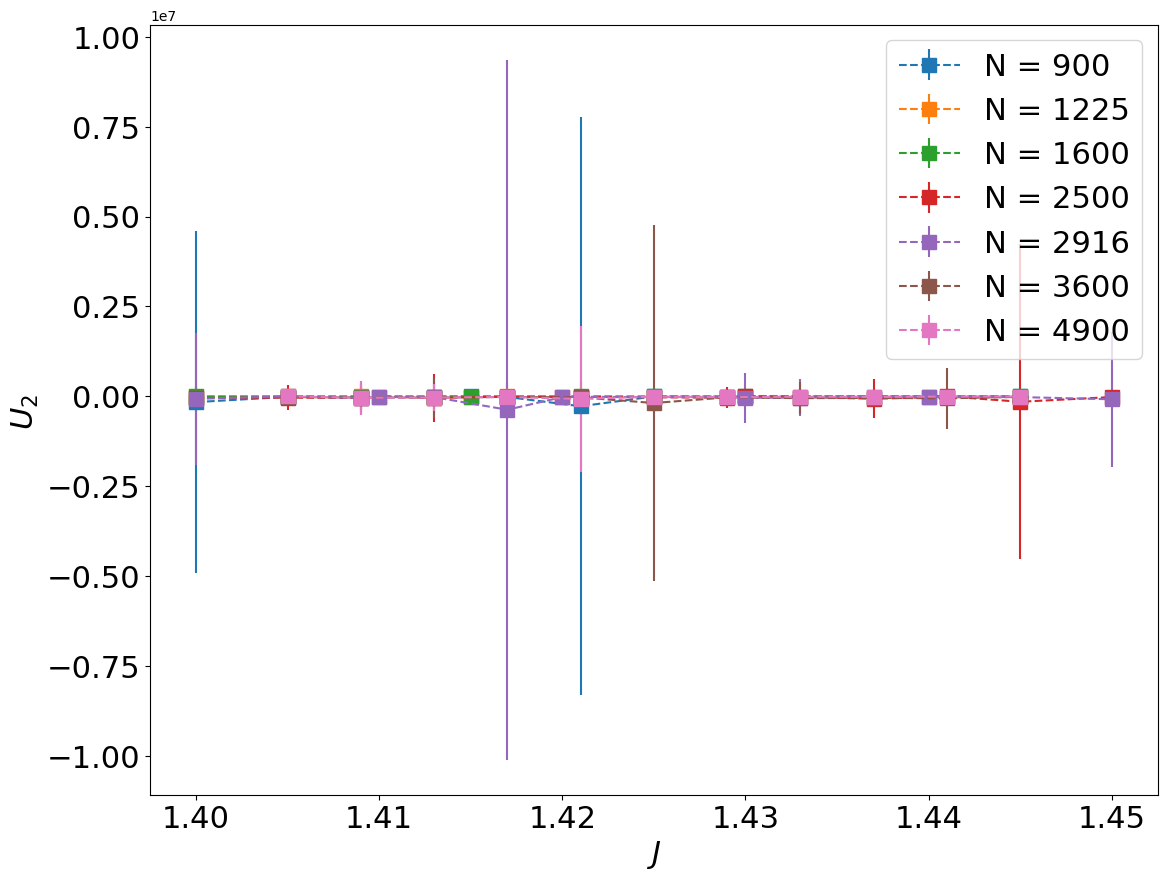

In [16]:
data_np = np.loadtxt("CPP/ClusterUpdateFix2/rerun/LongChains.txt", skiprows=0)


data_np = np.loadtxt("CPP/Simulations/LongChains.txt", skiprows=0)
data_np = np.loadtxt("CPP/MainRUn/LongChains.txt", skiprows=0)




y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

#data_np = data_np[data_np[:,0]<=2500]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

#l, b, h, w = .1485, .175, .31, .402
#ax2 = fig.add_axes([l, b, w, h])

J_min = 1.4
J_max = 1.45
data_np = data_np[data_np[:,1]<=J_max]
data_np = data_np[data_np[:,1]>=J_min]

for l in lengths:
    if (l>8000): continue
        #continue
        
    #if (l==6000): continue
        
    #if l!=900: continue 
    data_l1 = data_np[data_np[:,0]==l]
    
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    J_lplot = []
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
        
        #print(data_l[:,21])
        
        ind = np.argmin(data_l[:, 16])
        
        data_l = data_l[ind, :]        
        m2 = norm.rvs(data_l[17], data_l[18], size =  1000 )
        #m4 = norm.rvs(data_l[19], data_l[20], size =  1000 )
        cosmean = norm.rvs(data_l[15], data_l[16], size =  1000 )
        sinmean = norm.rvs(data_l[13], data_l[14], size =  1000 )
        m1 = np.sqrt(cosmean**2+sinmean**2)
        cum = 1 - m2/3/m1/m1
        mean = np.mean(cum)
        
        err=np.std(cum)
        
        #if (err>0.603): continue
 
        
        bc.append(mean)
        errs.append(err)
        J_lplot.append(J)

    plt.errorbar(J_lplot, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
    #print(errs)
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_2 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(0.02, 0.6)
#plt.xlim(0.825, 0.844)
#plt.xlim(0.825, 0.838)
 

plt.legend(loc="best", fontsize=22)


#plt.savefig("Thesis/Images/bindercumulants_longchains_deep.png", bbox_inches='tight')